In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read data 
df = pd.read_excel('WWTP-daily data 20200616.xlsx',skiprows=[1],header=[0,1], index_col=0)
df.head()

In [4]:
# Select required columns
idx = pd.IndexSlice
T_N = df.loc[:,idx[:,'T-N']].dropna(inplace=False) 
BOD = df.loc[:,idx[:,'BOD']].dropna(inplace=False)
COD = df.loc[:,idx[:,'CODMn']].dropna(inplace=False)
TP_Eff = df.loc[:,idx[:,'T-P']].dropna(inplace=False)
ORP = df.loc[:,idx[:,'ORP.1']].dropna(inplace=False)
Met = df.loc[:,idx[:,'Methanol']].dropna(inplace=False)
pH = df.loc[:,idx[:,'pH']].dropna(inplace=False)
DO = df.loc[:,idx[:,'DO']].dropna(inplace=False)
NH4_N = df.loc[:,idx[:,'NH4-N']].dropna(inplace=False).astype(str)
NO2_N = df.loc[:,idx[:,'NO2-N']].dropna(inplace=False).astype(str)
NO3_N = df.loc[:,idx[:,'NO3-N']].dropna(inplace=False).astype(str)
Re_Slu = df.loc[:,idx[:,'Return sludge flow rate']].dropna(inplace=False)
MLSS = df.loc[:,idx[:,'MLSS']].dropna(inplace=False)
MLVSS = df.loc[:,idx[:,'MLVSS']].dropna(inplace=False)

In [14]:
BOD.head()

,date,Influent water quality BOD,Effluent water quality BOD
0,2019-01-28,98.0,73.0
1,2019-02-04,223.0,55.0
2,2019-02-12,460.0,63.0
3,2019-02-25,1330.0,14.0
4,2019-03-04,1650.0,10.0


In [5]:
# Check data type
MLSS.dtypes, MLVSS.dtypes

(Second nitrification tank (On-site measurement)  MLSS    float64
 Liquid level adjustment tank                     MLSS    float64
 dtype: object,
 Second nitrification tank (On-site measurement)  MLVSS    float64
 Liquid level adjustment tank                     MLVSS    float64
 dtype: object)

In [6]:
# Convert e.g '<1.0' to 1.0 
TP_Eff[TP_Eff == '<1.0'] = 1.0
TP_Eff[TP_Eff == '<0.5'] = 0.5
TP_Eff[TP_Eff == '<0.1'] = 0.1
NH4_N[NH4_N == '<50'] = 50
NH4_N[NH4_N == '<100'] = 100
NO2_N[NO2_N == '<0.55'] = 0.05
NO2_N[NO2_N == '<0.05'] = 0.05
NO3_N[NO3_N == '<0.2'] = 0.2
NO3_N[NO3_N == '<0.05'] = 0.05

In [7]:
# Convert object to float
TP_Eff=TP_Eff.astype(float)
NH4_N=NH4_N.astype(float)
NO2_N=NO2_N.astype(float)
NO3_N=NO3_N.astype(float)
Re_Slu=Re_Slu.astype(float)

In [8]:
# Reset index
T_N = T_N.reset_index()
BOD = BOD.reset_index()
COD = COD.reset_index()
TP_Eff = TP_Eff.reset_index()
ORP = ORP.reset_index()
Met = Met.reset_index()
pH = pH.reset_index()
DO = DO.reset_index()
NH4_N = NH4_N.reset_index()
NO2_N = NO2_N.reset_index()
NO3_N = NO3_N.reset_index()
Re_Slu=Re_Slu.reset_index()
MLSS=MLSS.reset_index()
MLVSS=MLVSS.reset_index()

In [9]:
# Convert multilevel column index to single column index 
T_N.columns = [' '.join(col).strip() for col in T_N.columns.values]
BOD.columns = [' '.join(col).strip() for col in BOD.columns.values]
COD.columns = [' '.join(col).strip() for col in COD.columns.values]
TP_Eff.columns = [' '.join(col).strip() for col in TP_Eff.columns.values]
ORP.columns = [' '.join(col).strip() for col in ORP.columns.values]
Met.columns = [' '.join(col).strip() for col in Met.columns.values]
pH.columns = [' '.join(col).strip() for col in pH.columns.values]
DO.columns = [' '.join(col).strip() for col in DO.columns.values]
NH4_N.columns = [' '.join(col).strip() for col in NH4_N.columns.values]
NO2_N.columns = [' '.join(col).strip() for col in NO2_N.columns.values]
NO3_N.columns = [' '.join(col).strip() for col in NO3_N.columns.values]
Re_Slu.columns = [' '.join(col).strip() for col in Re_Slu.columns.values]
MLSS.columns = [' '.join(col).strip() for col in MLSS.columns.values]
MLVSS.columns = [' '.join(col).strip() for col in MLVSS.columns.values]

In [10]:
# Assign column name
TP_Eff=TP_Eff.rename(columns={'index':'date'})
BOD=BOD.rename(columns={'index':'date'})
COD=COD.rename(columns={'index':'date'})
T_N=T_N.rename(columns={'index':'date'})
ORP=ORP.rename(columns={'index':'date'})
Met=Met.rename(columns={'index':'date'})
pH=pH.rename(columns={'index':'date'})
DO=DO.rename(columns={'index':'date'})
NH4_N=NH4_N.rename(columns={'index':'date'})
NO2_N=NO2_N.rename(columns={'index':'date'})
NO3_N=NO3_N.rename(columns={'index':'date'})
Re_Slu=Re_Slu.rename(columns={'index':'date'})
MLSS=MLSS.rename(columns={'index':'date'})
MLVSS=MLVSS.rename(columns={'index':'date'})

In [11]:
Re_Slu=Re_Slu.rename(columns={'Unnamed: 1_level_0 Return sludge flow rate':'Return sludge flow rate'})

In [ ]:
# Check data
MLVSS.head()

**2nd Nitrification Tank Analysis**


MLSS/MLVSS

In [16]:
MLSS_Nit2 = MLSS[['date', 'Second nitrification tank (On-site measurement) MLSS']]
MLVSS_Nit2 = MLVSS[['date', 'Second nitrification tank (On-site measurement) MLVSS']]
BOD_Eff = BOD[['date', 'Effluent water quality BOD']]

In [ ]:
MLSS_Nit2 = pd.merge(MLSS_Nit2, MLVSS_Nit2, on='date')
MLSS_Nit2 = pd.merge(MLSS_Nit2, BOD_Eff, on='date')
MLSS_Nit2

In [ ]:
plt.plot('date', 'Effluent water quality BOD', data=MLSS_Nit2, color='brown', linewidth=2, label='BOD_Eff')

In [ ]:
plt.plot('date', 'Second nitrification tank (On-site measurement) MLSS', data=MLSS_Nit2, color='blue', linewidth=2, label='MLSS_Nit2')
plt.plot('date', 'Second nitrification tank (On-site measurement) MLVSS', data=MLSS_Nit2, color='green', linewidth=2, label='MLVSS_Nit2')
plt.legend(loc="lower right")

DO


In [20]:
DO_Nit2 = DO[['date', 'Second nitrification tank (On-site measurement) DO']]
DO_Nit2

,date,Second nitrification tank (On-site measurement) DO
0,2019-01-28,5.78
1,2019-01-29,5.07
2,2019-01-30,4.95
3,2019-01-31,5.27
4,2019-02-01,4.53
...,...,...
365,2020-02-25,2.07
366,2020-02-26,0.33
367,2020-02-27,0.48
368,2020-02-28,0.38


In [21]:
DO_Nit2.insert(2, "Lower limit", 2, False)

In [ ]:
plt.plot('date', 'Lower limit', data=DO_Nit2, color='red',linestyle='dashed', linewidth=2, label='Lower limit')
plt.scatter('date','Second nitrification tank (On-site measurement) DO', data=DO_Nit2, color='blue', label='DO_Nit2')
plt.legend(loc="lower right")

pH

In [ ]:
pH_Nit2 = pH[['date', 'Second nitrification tank (On-site measurement) pH']]
pH_Nit2.head()

In [24]:
pH_Nit2.insert(2, "Lower limit", 6.8, False)
pH_Nit2.insert(3, "Upper limit", 8, False)

In [ ]:
plt.plot('date','Second nitrification tank (On-site measurement) pH', data=pH_Nit2,color='blue',linewidth=2, label='pH_Nit2')
plt.plot('date', 'Upper limit', data=pH_Nit2, color='red',linestyle='dashed', linewidth=2, label='Upper limit')
plt.plot('date', 'Lower limit', data=pH_Nit2, color='red',linestyle='dashed', linewidth=2, label='Lower limit')
plt.legend(loc="lower right")

Nitrogen

In [26]:
NH4_N_Nit2 = NH4_N[['date','Second nitrification tank (On-site measurement) NH4-N']]
NO2_N_Nit2 = NO2_N[['date','Second nitrification tank (On-site measurement) NO2-N']]
NO3_N_Nit2 = NO3_N[['date','Second nitrification tank (On-site measurement) NO3-N']]

In [ ]:
N_Nit2 = pd.merge(NH4_N_Nit2, NO2_N_Nit2, on='date')
N_Nit2 = pd.merge(N_Nit2, NO3_N_Nit2, on='date')
N_Nit2.head()

In [ ]:
plt.plot('date','Second nitrification tank (On-site measurement) NH4-N', data=N_Nit2, color='blue', linewidth=2, label='NH4-N_Nit2')
plt.plot('date','Second nitrification tank (On-site measurement) NO2-N', data=N_Nit2, color='green', linewidth=2, label='NO2-N_Nit2')
plt.plot('date','Second nitrification tank (On-site measurement) NO3-N', data=N_Nit2, color='brown', linewidth=2, label='NO3-N_Nit2')
plt.legend(loc="lower right")

**Denitrification Tank Analysis**


Nitrogen

In [29]:
NH4_N_Den = NH4_N[['date','Denitrification tank (On-site measurement) NH4-N']]
NO2_N_Den = NO2_N[['date','Denitrification tank (On-site measurement) NO2-N']]
NO3_N_Den = NO3_N[['date','Denitrification tank (On-site measurement) NO3-N']]

In [30]:
N_Den = pd.merge(NH4_N_Den, NO2_N_Den, on='date')
N_Den = pd.merge(N_Den, NO3_N_Den, on='date')
N_Den = pd.merge(N_Den, Re_Slu, on='date')

In [ ]:
plt.plot('date', 'Denitrification tank (On-site measurement) NO2-N', data=N_Den, color='green', linewidth=2, label='NO2-N_Den')
plt.plot('date', 'Return sludge flow rate', data=N_Den, color='brown', linewidth=2, label='Return sludge flow rate')
plt.legend(loc="lower right")

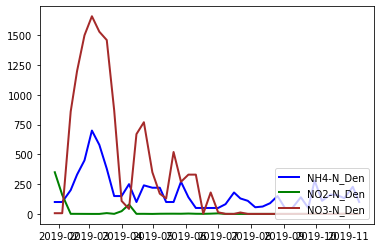

In [32]:
plt.plot('date', 'Denitrification tank (On-site measurement) NH4-N', data=N_Den, color='blue', linewidth=2, label='NH4-N_Den')
plt.plot('date', 'Denitrification tank (On-site measurement) NO2-N', data=N_Den, color='green', linewidth=2, label='NO2-N_Den')
plt.plot('date', 'Denitrification tank (On-site measurement) NO3-N', data=N_Den, color='brown', linewidth=2, label='NO3-N_Den')
plt.legend(loc="lower right")

DO

In [33]:
DO_den = DO[['date', 'Denitrification tank (On-site measurement) DO']]
DO_den

,date,Denitrification tank (On-site measurement) DO
0,2019-01-28,0.30
1,2019-01-29,0.31
2,2019-01-30,0.29
3,2019-01-31,0.63
4,2019-02-01,0.44
...,...,...
365,2020-02-25,0.07
366,2020-02-26,0.08
367,2020-02-27,0.11
368,2020-02-28,0.08


In [34]:
DO_den.insert(2, "Upper limit", 0.1, False)

In [ ]:
plt.plot('date', 'Upper limit', data=DO_den, color='red',linestyle='dashed', linewidth=2, label='Upper limit')
plt.scatter('date', 'Denitrification tank (On-site measurement) DO', data=DO_den, color='blue', label='DO_den')
plt.legend(loc="lower right")

pH

In [ ]:
pH_den = pH[['date', 'Denitrification tank (On-site measurement) pH']]
pH_den.head()

In [37]:
pH_den.insert(2, "Lower limit", 6, False)
pH_den.insert(3, "Upper limit", 9, False)

In [ ]:
plt.scatter('date', 'Denitrification tank (On-site measurement) pH', data=pH_den,color='blue', label='pH_Den')
plt.plot('date', 'Upper limit', data=pH_den, color='red',linestyle='dashed', linewidth=2, label='Upper limit')
plt.plot('date', 'Lower limit', data=pH_den, color='red',linestyle='dashed', linewidth=2, label='Lower limit')
plt.legend(loc="lower right")

ORP 


In [ ]:
# Insert limits for the graph plotting
ORP.insert(2, 'Upper limit', 50, False) 
ORP.insert(3, 'Lower limit', -200, False)
ORP 

In [ ]:
# Plot ORP in the denitrification tank (Anoxic)
plt.plot('date', 'Denitrification tank (On-site measurement) ORP.1', data=ORP, color='blue', linewidth=2, label='ORP_Den')
plt.plot('date', 'Upper limit', data=ORP, color='red',linestyle='dashed', linewidth=2, label='limit')
plt.plot('date', 'Lower limit', data=ORP, color='red',linestyle='dashed', linewidth=2)
plt.legend(loc="lower right")

**Inffluent Analysis**

Methanol


In [ ]:
# Create a new df for BOD and Methanol
BOD_Met = pd.merge(BOD, Met, on='date')
BOD_Met.head()

In [ ]:
# Select Influent data
BOD_Met = BOD_Met[['date', 'Influent water quality BOD', 'Unnamed: 2_level_0 Methanol' ]]
BOD_Met.head()

In [ ]:
# Compare BOD and Methanol at the same timeframe
plt.plot('date', 'Influent water quality BOD', data=BOD_Met, color='blue', linewidth=2, label='BOD (Inf)')
plt.plot('date', 'Unnamed: 2_level_0 Methanol', data=BOD_Met, color='brown', linewidth=2, label='Methanol')
plt.legend(loc="upper right")

BOD : N Ratio

In [44]:
BOD_N = pd.merge(BOD, T_N, on='date')

In [45]:
BOD_N_Inf = BOD_N[['date', 'Influent water quality BOD', 'Influent water quality T-N']]

In [46]:
BOD_To_N = BOD_N_Inf['Influent water quality BOD']/BOD_N_Inf['Influent water quality T-N']

In [47]:
BOD_N_Inf.insert(3, "BOD/T-N Ratio", BOD_To_N, False)
BOD_N_Inf.insert(4, "Critical Ratio", 2.5, False)

In [ ]:
BOD_N_Inf.head()

In [ ]:
plt.plot('date', 'BOD/T-N Ratio', data=BOD_N_Inf, color='blue', linewidth=2, label='BOD/T-N Ratio (Inf)')
plt.plot('date', 'Critical Ratio', data=BOD_N_Inf, color='red', linestyle='dashed',linewidth=2, label='BOD/T-N Critical Ratio')
plt.legend(loc="upper right")

COD : BOD ratio

In [51]:
COD_BOD = pd.merge(COD, BOD, on='date')

In [52]:
COD_BOD_Inf = COD_BOD[['date', 'Influent water quality CODMn','Effluent water quality CODMn', 'Influent water quality BOD']]

In [53]:
COD_To_BOD = COD_BOD_Inf['Influent water quality CODMn']/COD_BOD_Inf['Influent water quality BOD']

In [54]:
COD_BOD_Inf.insert(4, "COD/BOD Ratio", COD_To_BOD, False) 
COD_BOD_Inf.insert(5, 'Critical Ratio = 2', 2, False) 

In [ ]:
COD_BOD_Inf.head()

In [ ]:
plt.plot('date', 'COD/BOD Ratio', data=COD_BOD_Inf, color='blue', linewidth=2, label='COD/BOD Ratio (Inf)')
plt.plot('date', 'Critical Ratio = 2', data=COD_BOD_Inf, color='red', linestyle='dashed', linewidth=2, label='COD/BOD Critical Ratio')
plt.legend(loc="upper right")

BOD : T-P Ratio

In [ ]:
BOD_TP= pd.merge(BOD, TP_Eff, on='date')
BOD_TP.head()

In [58]:
BOD_TP_Inf = BOD_TP[['date', 'Influent water quality BOD', 'Influent water quality T-P']]

In [59]:
BOD_To_TP = BOD_TP_Inf['Influent water quality BOD']/BOD_TP_Inf['Influent water quality T-P']

In [60]:
BOD_TP_Inf.insert(3, "BOD/T-P Ratio", BOD_To_TP, False) 
BOD_TP_Inf.insert(4, 'Critical Ratio = 20', 20, False) 

In [ ]:
BOD_TP_Inf.head()

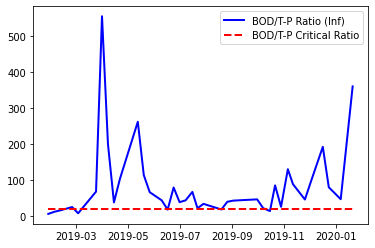

In [65]:
plt.plot('date', 'BOD/T-P Ratio', data=BOD_TP_Inf, color='blue', linewidth=2, label='BOD/T-P Ratio (Inf)')
plt.plot('date', 'Critical Ratio = 20', data=BOD_TP_Inf, color='red', linestyle='dashed',linewidth=2, label='BOD/T-P Critical Ratio')
plt.legend(loc="upper right")